<div class="alert alert-success">
<h3> Will be transated...</h3>

</div>

# Рекомендация тарифов

## Сравнение моделей решения задачи бинарной классификации для определения оптимального тарифа клиентов оператора мобильной связи «Мегалайн»
---
#### В исследовании представлен анализ пяти моделей:
- решающее дерево (DecisionTreeClassifier)
- случайный лес (RandomForestClassifier)
- логистическая регрессия (LogisticRegression)
- k ближайших соседей (KNeighborsClassifier)
- метод опорных векторов (svm.SVC)

Данные разбиты на 3 выборки: обучающая (60%), валидационная (20%), тестовая (20%).
Каждая модель обучена на обучающей выборке и оценена на валидационной. Модели с лучшими параметрами протестированы на тестовой выборке.

#### Описание данных:
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

---
<a id='the_contents'></a>
#### Исследование состоит из 6 частей.

##### Часть 1. Изучение общей информации и подготовка данных.
* [1. Импорт библиотек.](#the_part_1.1)
* [2. Загрузка файла.](#the_part_1.2)
* [3. Изучение общей информации.](#the_part_1.3)

##### Часть 2. Разбиение на выборки.
* [1. Разбиение исходных данных на выборки.](#the_part_2.1)
* [1. Проверка результата разбиения.](#the_part_2.2)

##### Часть 3. Исследование моделей.
* [1. Исследование модели решающего дерева.](#the_part_3.1)
* [2. Исследование модели случайного леса.](#the_part_3.2)
* [3. Исследование модели логистической регрессии.](#the_part_3.3)
* [4. Исследование модели k ближайших соседей.](#the_part_3.4)
* [5. Исследование модели метод опорных векторов.](#the_part_3.5)

##### Часть 4. Проверка моделей на тестовой выборке.
* [1. Сравнение моделей на тестовой выборке.](#the_part_4.1)

##### Часть 5. Проверка моделей на адекватность.
* [1. Сравнение моделей с применением ROC-кривых.](#the_part_5)

##### Часть 6. Общий вывод.
* [Вывод по исследованию.](#the_part_6)
---

## Часть 1. Изучение общей информации и подготовка данных.

<a id='the_part_1.1'></a>
#### 1. Импорт библиотек, загрузка файла, изучение общей информации.

In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import matplotlib
import matplotlib.ticker
import matplotlib.pyplot as plt
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pylab as pl
from sklearn.metrics import roc_curve, auc

<a id='the_part_1.2'></a>
#### 2. Загрузка файла.

In [2]:
# Загружаем файл данных
df = pd.read_csv('https://C:/datasets/users_behavior.csv')

<a id='the_part_1.3'></a>
#### 3. Изучение общей информации.

In [3]:
# Общая информация
df.info()
display(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0


In [4]:
# Определим функцию анализа пропущенных данных
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total missing data', 'Percent missing data'])

# Выполним поиск пропущенных данных и дубликатов
display(missing_data(df)) # поиск пропущенных данных
print('Дубликаты:', df.duplicated().sum()) # поиск дубликатов

,Total missing data,Percent missing data
is_ultra,0,0.0
mb_used,0,0.0
messages,0,0.0
minutes,0,0.0
calls,0,0.0


Дубликаты: 0


In [5]:
# Общая статистика по числовым данным
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
display(df['is_ultra'].value_counts())

0    2229
1     985
Name: is_ultra, dtype: int64

#### Вывод
- пропущенных данных нет
- дубликатов нет

Данные готовы к анализу.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

## Часть 2. Разбиение на выборки

<a id='the_part_2.1'></a>
#### 1. Разбиение исходных данных на выборки.

Разделим данные на обучающую-валидационную-тестовую выборки в соотношении 60%-20%-20%.

In [7]:
# Выделяем признаки из набора данных
features = df.drop(['is_ultra'], axis=1)
# Выделяем целевой признак
target = df['is_ultra']

# Делим данные на обучающую-валидационную-тестовую выборки в соотношении 60%-20%-20%
## Сначала выделяем 60% на обучающую выборку
features_train, features_remain, target_train, target_remain = train_test_split(
    features, target, test_size=0.4, random_state=12345)

## Оставшиеся 40% делим пополам, получаем от исходного по 20% на валидационную и тестовую
features_valid, features_test, target_valid, target_test = train_test_split(
    features_remain, target_remain, test_size=0.5, random_state=12345)

<a id='the_part_2.2'></a>
#### 2. Проверка результата разбиения.

In [8]:
# Обучающая выборка
print('Обучающая выборка, размерность:')
print('Признаки:', features_train.shape, 
      '\nЦелевые признаки:', target_train.shape)
print(round(features_train.shape[0] / df.shape[0] * 100, 1), '% от исходного датафрейма')

# Валидационная выборка
print('\nВалидационная выборка, размерность:')
print('Признаки', features_valid.shape,
      '\nЦелевые признаки', target_valid.shape)
print(round(features_valid.shape[0] / df.shape[0] * 100, 1), '% от исходного датафрейма')

# Тестовая выборка
print('\nТестовая выборка, размерность:')
print('Признаки', features_test.shape,
      '\nЦелевые признаки', target_test.shape)
print(round(features_test.shape[0] / df.shape[0] * 100, 1), '% от исходного датафрейма')

Обучающая выборка, размерность:
Признаки: (1928, 4) 
Целевые признаки: (1928,)
60.0 % от исходного датафрейма

Валидационная выборка, размерность:
Признаки (643, 4) 
Целевые признаки (643,)
20.0 % от исходного датафрейма

Тестовая выборка, размерность:
Признаки (643, 4) 
Целевые признаки (643,)
20.0 % от исходного датафрейма


#### Вывод

Данные разбиты на обучающую-валидационную-тестовую выборки в соотношении 60%-20%-20%.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

## Часть 3. Исследование моделей.

<a id='the_part_3.1'></a>
#### 1. Исследование модели решающего дерева.

Проведем исследование модели решающего дерева, изменяя гиперпараметр max_depth. Обучение модели будем проводить на обучающей выборке, проверку работы - на валидационной. Построим графики зависимости показателя `accuracy` модели от гиперпараметра `max_depth` на тестовой и валидационной выборках. Показатель качества работы модели `accuracy` будем вычислять методом `.score()` .

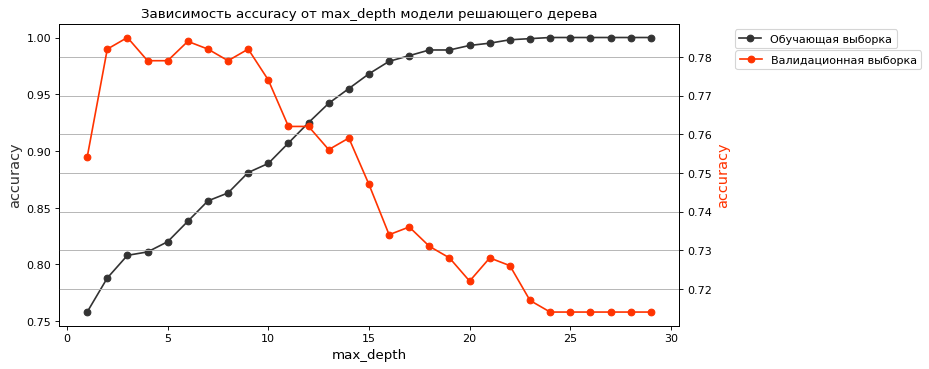

Accuracy max: 
    index  accuracy_dtc_train  accuracy_dtc_valid
2      3               0.808               0.785


In [9]:
# Поиск лучшего варианта для модели решающего дерева по валидационной выборке
accuracy_dtc_train = []
accuracy_dtc_valid = []
n = []

# Перебираем в цикле гиперпараметр max_depth
for mdep in range(1, 30, 1):
    n.append(mdep)
    model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=mdep) # решающее дерево
    model_dtc.fit(features_train, target_train)
    accuracy_dtc_train.append(model_dtc.score(features_train, target_train).round(3))
    accuracy_dtc_valid.append(model_dtc.score(features_valid, target_valid).round(3))

# Собираем датафрейм из полученных accuracy на обучающей и валидационной выборках    
accuracy_dtc_df = pd.DataFrame(data=accuracy_dtc_train, index=n, columns=['accuracy_dtc_train'])
accuracy_dtc_df['accuracy_dtc_valid'] = accuracy_dtc_valid
accuracy_dtc_df.reset_index(inplace=True)

# Cтроим графики
fig = plt.figure(figsize=(10, 5), dpi= 80)

ax1 = plt.subplot()
ax1.plot('index', 'accuracy_dtc_train', data=accuracy_dtc_df, color='#333333', label="Обучающая выборка", marker='o')
ax1.yaxis.set_ticks_position("left")
ax1.set_ylabel('accuracy', color='#333333', fontsize=13)
plt.legend(loc='best', bbox_to_anchor=(1.081, 1))
plt.xlabel('max_depth', fontsize=12)
# plt.ylim(0.71, 1.02)

ax2 = ax1.twinx()
ax2.plot('index', 'accuracy_dtc_valid', data=accuracy_dtc_df, color='#FF3300', label="Валидационная выборка", marker='o')
ax2.yaxis.set_ticks_position("right")
ax2.set_ylabel('accuracy', color='#FF3300', fontsize=13)
# plt.ylim(0.71, 1.02)

# Декорации
plt.title('Зависимость accuracy от max_depth модели решающего дерева')
plt.legend(loc='best', bbox_to_anchor=(1.4, 0.93))
plt.grid(True)
plt.show()

print("Accuracy max: \n", accuracy_dtc_df.loc[accuracy_dtc_df['accuracy_dtc_valid'] == accuracy_dtc_df['accuracy_dtc_valid'].max()])

#### Вывод
При `max_depth` > 10 модель проявляет признаки переобучения - на тестовой выборке качество растет, на валидационной падает.
Для проверки модели на тестовой выборке возьмем `max_depth` = 6 — середину области значений `max_depth`, где `accuracy` находится вблизи максимума.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_3.2'></a>
#### 2. Исследование модели случайного леса.

Проведем исследование модели случайного леса, изменяя гиперпараметр `n_estimators`. Обучение модели будем проводить на обучающей выборке, проверку работы - на валидационной. Построим графики зависимости показателя `accuracy` модели от гиперпараметра `n_estimators` на тестовой и валидационной выборках. Показатель качества работы модели `accuracy` будем вычислять методом `.score()` .

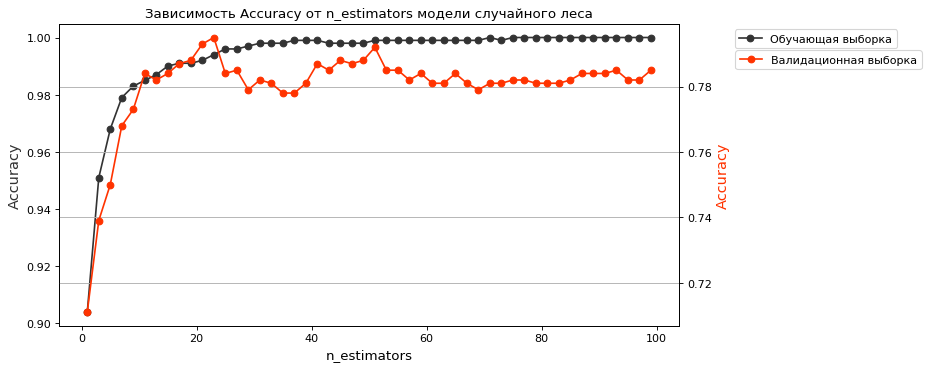

Accuracy max: 
     index  accuracy_rfc_train  accuracy_rfc_valid
11     23               0.994               0.795


In [10]:
# Поиск лучшего варианта для модели случайного леса по валидационной выборке
accuracy_rfc_train = []
accuracy_rfc_valid = []
n = []

# Перебираем в цикле гиперпараметр n_estimators
for est in range(1, 101, 2):
    n.append(est)
    model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est) # случайный лес
    model_rfc.fit(features_train, target_train)
    accuracy_rfc_train.append(model_rfc.score(features_train, target_train).round(3))
    accuracy_rfc_valid.append(model_rfc.score(features_valid, target_valid).round(3))

# Собираем датафрейм из полученных accuracy на обучающей и валидационной выборках    
accuracy_rfc_df = pd.DataFrame(data=accuracy_rfc_train, index=n, columns=['accuracy_rfc_train'])
accuracy_rfc_df['accuracy_rfc_valid'] = accuracy_rfc_valid
accuracy_rfc_df.reset_index(inplace=True)

# Cтроим графики
fig = plt.figure(figsize=(10, 5), dpi= 80)

ax1 = plt.subplot()
ax1.plot('index', 'accuracy_rfc_train', data=accuracy_rfc_df, color='#333333', label="Обучающая выборка", marker='o')
ax1.yaxis.set_ticks_position("left")
ax1.set_ylabel('Accuracy', color='#333333', fontsize=13)
plt.legend(loc='best', bbox_to_anchor=(1.081, 1))
plt.xlabel('n_estimators', fontsize=12)

ax2 = ax1.twinx()
ax2.plot('index', 'accuracy_rfc_valid', data=accuracy_rfc_df, color='#FF3300', label="Валидационная выборка", marker='o')
ax2.yaxis.set_ticks_position("right")
ax2.set_ylabel('Accuracy', color='#FF3300', fontsize=13)

# Декорации
plt.title('Зависимость Accuracy от n_estimators модели случайного леса')
plt.legend(loc='best', bbox_to_anchor=(1.4, 0.93))
plt.grid(True)
plt.show()

print("Accuracy max: \n", accuracy_rfc_df.loc[accuracy_rfc_df['accuracy_rfc_valid'] == accuracy_rfc_df['accuracy_rfc_valid'].max()])

#### Вывод
Хорошее качество модели проявляется при `n_estimators` в диапазоне от 12 до 28 и от 42 до 52. Вторая область соответствует более сложным вариантам модели, которые в общем случае более адекватно определяют закономерности. Для проверки модели на тестовой выборке возьмем `n_estimators` = 47 — середину второй области `max_depth`, где `accuracy` находится вблизи максимальных значений.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_3.3'></a>
#### 3. Исследование модели логистической регрессии.

Проведем исследование модели случайного леса, изменяя гиперпараметр `C` (Inverse of regularization strength). Обучение модели будем проводить на обучающей выборке, проверку работы - на валидационной. Построим графики зависимости показателя `accuracy` модели от гиперпараметра `C` на тестовой и валидационной выборках. Показатель качества работы модели `accuracy` будем вычислять методом `.score()` .

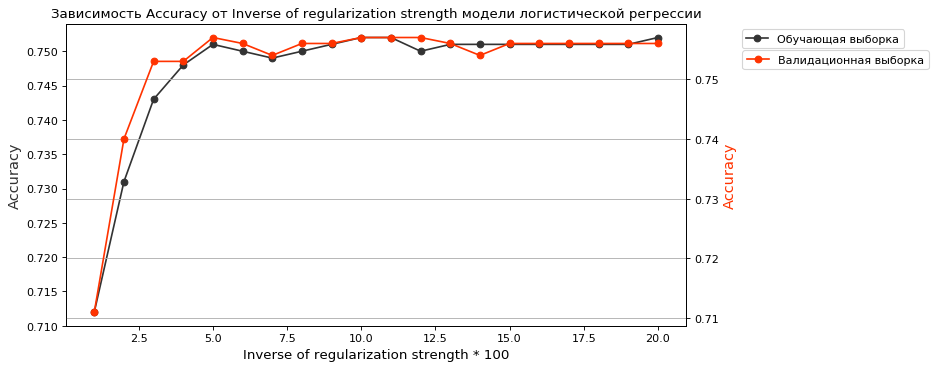

Accuracy max: 
     index  accuracy_lor_train  accuracy_lor_valid
4       5               0.751               0.757
9      10               0.752               0.757
10     11               0.752               0.757
11     12               0.750               0.757


In [11]:
# Поиск лучшего варианта для модели логистической регрессии по валидационной выборке
accuracy_lor = []
accuracy_lor_train = []
accuracy_lor_valid = []
n = []

# Перебираем в цикле гиперпараметр C
for c in range(1, 21, 1):
    n.append(c)
    model_lor = LogisticRegression(random_state=12345, penalty='l1', solver='liblinear', C=0.01*c) # логистическая регрессия
    model_lor.fit(features_train, target_train)
    accuracy_lor_train.append(model_lor.score(features_train, target_train).round(3))
    accuracy_lor_valid.append(model_lor.score(features_valid, target_valid).round(3))

# Собираем датафрейм из полученных accuracy на обучающей и валидационной выборках
accuracy_lor_df = pd.DataFrame(data=accuracy_lor_train, index=n, columns=['accuracy_lor_train'])
accuracy_lor_df['accuracy_lor_valid'] = accuracy_lor_valid
accuracy_lor_df.reset_index(inplace=True)

# Cтроим графики
fig = plt.figure(figsize=(10, 5), dpi= 80)

ax1 = plt.subplot()
ax1.plot('index', 'accuracy_lor_train', data=accuracy_lor_df, color='#333333', label="Обучающая выборка", marker='o')
ax1.yaxis.set_ticks_position("left")
ax1.set_ylabel('Accuracy', color='#333333', fontsize=13)
plt.legend(loc='best', bbox_to_anchor=(1.36, 1))
plt.xlabel('Inverse of regularization strength * 100', fontsize=12)

ax2 = ax1.twinx()
ax2.plot('index', 'accuracy_lor_valid', data=accuracy_lor_df, color='#FF3300', label="Валидационная выборка", marker='o')
ax2.yaxis.set_ticks_position("right")
ax2.set_ylabel('Accuracy', color='#FF3300', fontsize=13)

# Декорации
plt.title('Зависимость Accuracy от Inverse of regularization strength модели логистической регрессии')
plt.legend(loc='best', bbox_to_anchor=(1.4, 0.93))
plt.grid(True)
plt.show()

print("Accuracy max: \n", accuracy_lor_df.loc[accuracy_lor_df['accuracy_lor_valid'] == accuracy_lor_df['accuracy_lor_valid'].max()])

#### Вывод
Модель достигает зоны максимальных значений `accuracy` при параметре `С` 0,05 и выше. Для проверки модели на тестовой выборке возьмем `С` = 0,1.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_3.4'></a>
#### 4. Исследование модели k ближайших соседей.

Проведем исследование модели k ближайших соседей, изменяя гиперпараметр `n_neighbors`. Обучение модели будем проводить на обучающей выборке, проверку работы - на валидационной. Построим графики зависимости показателя `accuracy` модели от гиперпараметра `n_neighbors` на тестовой и валидационной выборках. Показатель качества работы модели `accuracy` будем вычислять методом `.score()` .

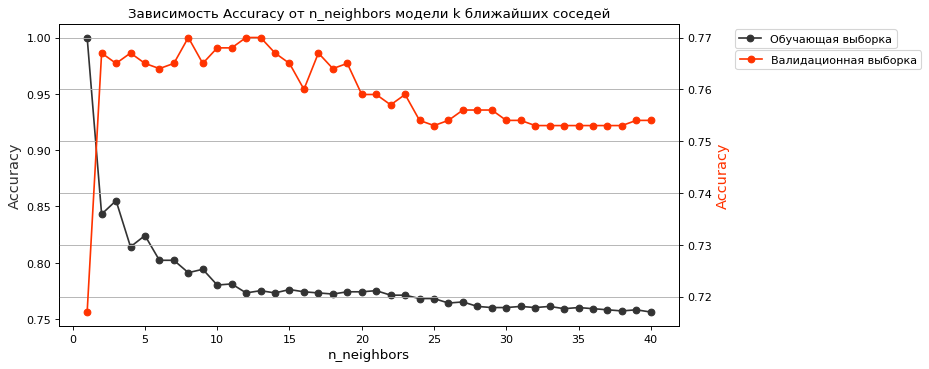

Accuracy max: 
     index  accuracy_knc_train  accuracy_knc_valid
7       8               0.791                0.77
11     12               0.773                0.77
12     13               0.775                0.77


In [12]:
# Поиск лучшего варианта для модели k Ближайших Соседей по валидационной выборке
accuracy_knc_train = []
accuracy_knc_valid = []
n = []

# Перебираем в цикле гиперпараметр n_neighbors
for k in range(1, 41, 1):
    n.append(k)
    model_knc = KNeighborsClassifier(n_neighbors = k) # k Ближайших Соседей
    model_knc.fit(features_train, target_train)
    accuracy_knc_train.append(model_knc.score(features_train, target_train).round(3))
    accuracy_knc_valid.append(model_knc.score(features_valid, target_valid).round(3))

# Собираем датафрейм из полученных accuracy на обучающей и валидационной выборках
accuracy_knc_df = pd.DataFrame(data=accuracy_knc_train, index=n, columns=['accuracy_knc_train'])
accuracy_knc_df['accuracy_knc_valid'] = accuracy_knc_valid
accuracy_knc_df.reset_index(inplace=True)

# Cтроим графики
fig = plt.figure(figsize=(10, 5), dpi= 80)

ax1 = plt.subplot()
ax1.plot('index', 'accuracy_knc_train', data=accuracy_knc_df, color='#333333', label="Обучающая выборка", marker='o')
ax1.yaxis.set_ticks_position("left")
ax1.set_ylabel('Accuracy', color='#333333', fontsize=13)
plt.legend(loc='best', bbox_to_anchor=(1.36, 1))
plt.xlabel('n_neighbors', fontsize=12)
# plt.ylim(0.71, 1.02)

ax2 = ax1.twinx()
ax2.plot('index', 'accuracy_knc_valid', data=accuracy_knc_df, color='#FF3300', label="Валидационная выборка", marker='o')
ax2.yaxis.set_ticks_position("right")
ax2.set_ylabel('Accuracy', color='#FF3300', fontsize=13)
# plt.ylim(0.71, 1.02)

# Декорации
plt.title('Зависимость Accuracy от n_neighbors модели k ближайших соседей')
plt.legend(loc='best', bbox_to_anchor=(1.4, 0.93))
plt.grid(True)
plt.show()

print("Accuracy max: \n", accuracy_knc_df.loc[accuracy_knc_df['accuracy_knc_valid'] == accuracy_knc_df['accuracy_knc_valid'].max()])

#### Вывод
Модель показывает удовлетворительные результаты по показателю `accuracy` при `n_neighbors` в диапазоне от 2 до 20. При дальнейшем увеличении `n_neighbors` качество модели снижается. Для проверки модели на тестовой выборке возьмем `n_neighbors` = 8.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

<a id='the_part_3.5'></a>
#### 5. Исследование модели метод опорных векторов.

Проведем исследование модели метод опорных векторов, изменяя гиперпараметр `C` (параметр регуляризации). Обучение модели будем проводить на обучающей выборке, проверку работы - на валидационной. Построим графики зависимости показателя `accuracy` модели от гиперпараметра `C` на тестовой и валидационной выборках. Показатель качества работы модели `accuracy` будем вычислять методом `.score()` .

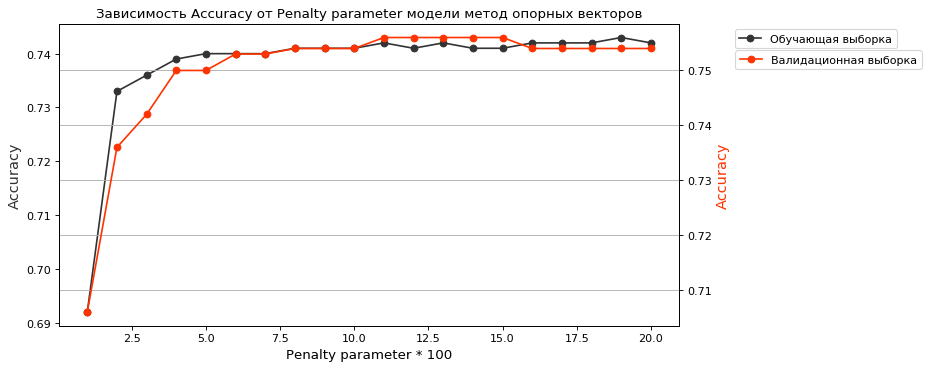

Accuracy max: 
     index  accuracy_svc_train  accuracy_svc_valid
10     11               0.742               0.756
11     12               0.741               0.756
12     13               0.742               0.756
13     14               0.741               0.756
14     15               0.741               0.756


In [13]:
# Поиск лучшего варианта для модели Метод Опорных Векторов по валидационной выборке
accuracy_svc = []
accuracy_svc_train = []
accuracy_svc_valid = []
n = []

# Перебираем в цикле гиперпараметр C
for c in range(1, 21, 1):
    n.append(c)
    model_svc = svm.SVC(gamma='scale', C=0.01*c) # Метод Опорных Векторов
    model_svc.fit(features_train, target_train)
    accuracy_svc_train.append(model_svc.score(features_train, target_train).round(3))
    accuracy_svc_valid.append(model_svc.score(features_valid, target_valid).round(3))

# Собираем датафрейм из полученных accuracy на обучающей и валидационной выборках
accuracy_svc_df = pd.DataFrame(data=accuracy_svc_train, index=n, columns=['accuracy_svc_train'])
accuracy_svc_df['accuracy_svc_valid'] = accuracy_svc_valid
accuracy_svc_df.reset_index(inplace=True)

# Cтроим графики
fig = plt.figure(figsize=(10, 5), dpi= 80)

ax1 = plt.subplot()
ax1.plot('index', 'accuracy_svc_train', data=accuracy_svc_df, color='#333333', label="Обучающая выборка", marker='o')
ax1.yaxis.set_ticks_position("left")
ax1.set_ylabel('Accuracy', color='#333333', fontsize=13)
plt.legend(loc='best', bbox_to_anchor=(1.36, 1))
plt.xlabel('Penalty parameter * 100', fontsize=12)

ax2 = ax1.twinx()
ax2.plot('index', 'accuracy_svc_valid', data=accuracy_svc_df, color='#FF3300', label="Валидационная выборка", marker='o')
ax2.yaxis.set_ticks_position("right")
ax2.set_ylabel('Accuracy', color='#FF3300', fontsize=13)

# Декорации
plt.title('Зависимость Accuracy от Penalty parameter модели метод опорных векторов')
plt.legend(loc='best', bbox_to_anchor=(1.4, 0.93))
plt.grid(True)
plt.show()

print("Accuracy max: \n", accuracy_svc_df.loc[accuracy_svc_df['accuracy_svc_valid'] == accuracy_svc_df['accuracy_svc_valid'].max()])

#### Вывод
Модель достигает зоны максимальных значений `accuracy` при параметре `С` 0,06 и выше. Для проверки модели на тестовой выборке возьмем `С` = 0,14.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

## Часть 4. Проверка моделей на тестовой выборке.

<a id='the_part_4.1'></a>
#### 1. Сравнение моделей на тестовой выборке.

Протестируем модели, сравнив результаты их работы на тестовой выборке с параметрами, определенными по валидационной выборке.

In [14]:
print('Аccuracy моделей, полученное на тестовой выборке:')

# Модель решающего дерева
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_dtc.fit(features_train, target_train)
print('Решающее дерево:', model_dtc.score(features_test, target_test).round(3))

# Модель случайного леса
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=47)
model_rfc.fit(features_train, target_train)
print('Случайный лес:', model_rfc.score(features_test, target_test).round(3))

# Модель логистической регрессии
model_lor = LogisticRegression(random_state=12345, penalty='l1', solver='liblinear', C=0.1)
model_lor.fit(features_train, target_train)
print('Логистическая регрессия:', model_lor.score(features_test, target_test).round(3))

# Модель k ближайших соседей
model_knc = KNeighborsClassifier(n_neighbors = 8)
model_knc.fit(features_train, target_train)
print('k ближайших соседей:', model_knc.score(features_test, target_test).round(3))

# Модель метод опорных векторов
model_svc = svm.SVC(gamma='scale', C=0.14)
model_svc.fit(features_train, target_train)
print('Метод опорных векторов:', model_svc.score(features_test, target_test).round(3))

Аccuracy моделей, полученное на тестовой выборке:
Решающее дерево: 0.776
Случайный лес: 0.793
Логистическая регрессия: 0.74
k ближайших соседей: 0.753
Метод опорных векторов: 0.739


#### Вывод

Модель случайного леса показала лучшую предсказательную способность, её Аccuracy на тестовой выборке 0,793.

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

## Часть 5. Проверка моделей на адекватность.

<a id='the_part_5'></a>
#### 1. Сравнение моделей с применением ROC-кривых.

Сравним модели с помощью ROC-анализа. Диагональная прямая на графике соответствует худшей модели бинарной классификации - случайному бинарному выбору. Чем больше площадь под полученной кривой, тем качественнее соответствующая модель.

<Figure size 432x288 with 0 Axes>

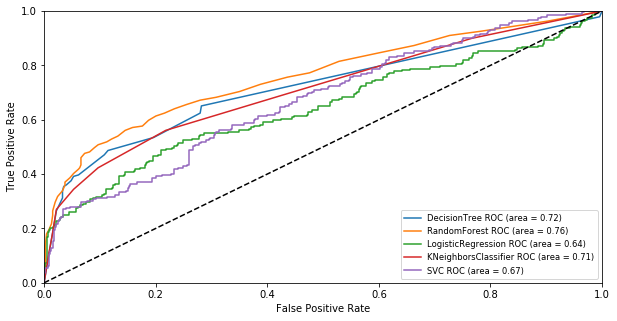

In [15]:
# Построим графики ROC-кривых

pl.clf()
plt.figure(figsize=(10,5))

# DTC
probas = model_dtc.fit(features_train, target_train).predict_proba(features_valid)
fpr, tpr, thresholds = roc_curve(target_valid, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('DecisionTree',roc_auc))

# RFC
probas = model_rfc.fit(features_train, target_train).predict_proba(features_valid)
fpr, tpr, thresholds = roc_curve(target_valid, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandomForest',roc_auc))

# LoR
probas = model_lor.fit(features_train, target_train).predict_proba(features_valid)
fpr, tpr, thresholds = roc_curve(target_valid, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))

# KNC
probas = model_knc.fit(features_train, target_train).predict_proba(features_valid)
fpr, tpr, thresholds = roc_curve(target_valid, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))

#SVC
model_svc.probability = True
probas = model_svc.fit(features_train, target_train).predict_proba(features_valid)
fpr, tpr, thresholds = roc_curve(target_valid, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('SVC', roc_auc))

# Декорации
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(fontsize='small', loc='lower right')
pl.show()

#### Вывод

Модель случайного леса показала лучшее качество работы. Площадь под ROC-кривой для этой модели (показатель AUC) наибольшая среди рассмотренных моделей - 0,76. 

In [16]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)

## Часть 6. Общий вывод.

<a id='the_part_6'></a>
#### Вывод по исследованию.

*1. Рассмотрены 5 моделей решения задачи бинарной классификации для определения оптимального тарифа клиентов оператора мобильной связи «Мегалайн»:*
- *решающее дерево (DecisionTreeClassifier)*
- *случайный лес (RandomForestClassifier)*
- *логистическая регрессия (LogisticRegression)*
- *k ближайших соседей (KNeighborsClassifier)*
- *метод опорных векторов (svm.SVC)*

*2. Данные разбивались на обучающую-валидационную-тестовую выборки в соотношении 60%-20%-20%. Обучение моделей проводилось на обучающей выборке, проверка работы - на валидационной. Для каждой модели подбирались оптимальные значения гиперпараметра. Итоговое тестирование моделей проводилось на тестовой выборке. Качество работы моделей определялось по показателю `accuracy`, который вычислялся методом `.score()`.*

*3. По результатам анализа определена модель с наилучшим качеством - модель случайного леса с параметром n_estimators = 47. На тестовой выборке Accuracy составил 0,793.*

*4. Сравнение моделей с помощью ROC-анализа подтвердило лучшее качество модели случайного леса.*

[<span style="color:green"> Возврат к оглавлению.</span>](#the_contents)